In [2]:
#knn(k Nearest Neighbor) – Uses Euclidean Distance for classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_excel("Diabetes.xlsx")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
y = data["Outcome"].values
x = data.drop(["Outcome"],axis=1)

In [5]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(data)
#Divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test


In [7]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)

    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)


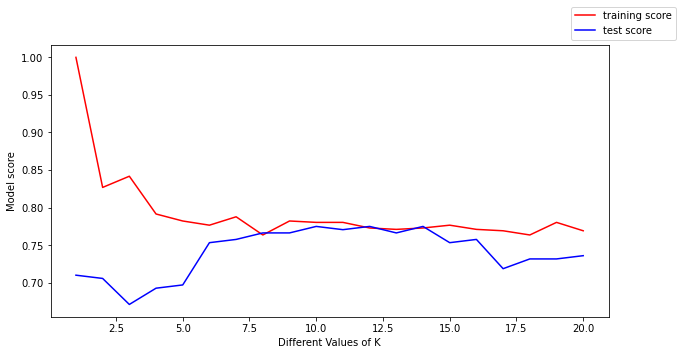

In [8]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
bbox_transform=plt.gcf().transFigure)
plt.show()


In [10]:
#Trying with various values for n_neighbors
knn = KNeighborsClassifier(n_neighbors = 14)

#Fit the model
knn.fit(X_train,y_train)

#get the score
knn.score(X_test,y_test)


0.7748917748917749

In [11]:
knn = KNeighborsClassifier(n_neighbors = 17)

#Fit the model
knn.fit(X_train,y_train)

#get the score
knn.score(X_test,y_test)



0.7186147186147186

In [12]:
knn = KNeighborsClassifier(n_neighbors = 20)

#Fit the model
knn.fit(X_train,y_train)

#get the score
knn.score(X_test,y_test)



0.7359307359307359

In [13]:
k,train_score,test_score

(20,
 [1.0,
  0.8268156424581006,
  0.8417132216014898,
  0.7914338919925512,
  0.7821229050279329,
  0.776536312849162,
  0.7877094972067039,
  0.7635009310986964,
  0.7821229050279329,
  0.7802607076350093,
  0.7802607076350093,
  0.7728119180633147,
  0.770949720670391,
  0.7728119180633147,
  0.776536312849162,
  0.770949720670391,
  0.7690875232774674,
  0.7635009310986964,
  0.7802607076350093,
  0.7690875232774674],
 [0.70995670995671,
  0.7056277056277056,
  0.670995670995671,
  0.6926406926406926,
  0.696969696969697,
  0.7532467532467533,
  0.7575757575757576,
  0.7662337662337663,
  0.7662337662337663,
  0.7748917748917749,
  0.7705627705627706,
  0.7748917748917749,
  0.7662337662337663,
  0.7748917748917749,
  0.7532467532467533,
  0.7575757575757576,
  0.7186147186147186,
  0.7316017316017316,
  0.7316017316017316,
  0.7359307359307359])

In [14]:
#Prediction
y_pred=knn.predict(X_test)
y_pred


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)